#Assignment 2
Enhancing Model Performance with Additional Features

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#1. Load Dataset into DataFrame

In [2]:
cchurn=pd.read_excel('Customer-Churn.xlsx')
cchurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#2. Data Exploration

In [3]:
#Dataset overview of first 5 rows
cchurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Dimensions of the data set
cchurn.shape

(7043, 21)

In [5]:
#Check datatypes and column information
cchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Statistical data of all numeric columns
cchurn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#Check null values
cchurn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Check duplicated values
cchurn.duplicated().sum()

0

In [9]:
#Check all column headers
cchurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Checking for outliers in numeric columns

<Axes: ylabel='TotalCharges'>

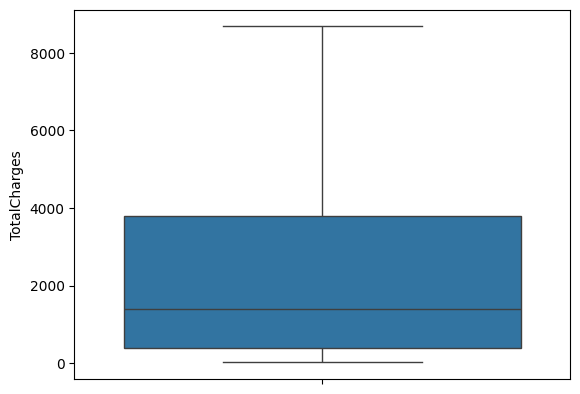

In [10]:
sns.boxplot(cchurn['TotalCharges'])

<Axes: ylabel='tenure'>

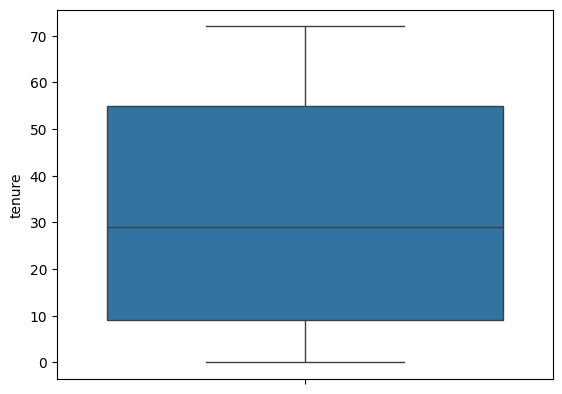

In [11]:
sns.boxplot(cchurn['tenure'])

<Axes: ylabel='MonthlyCharges'>

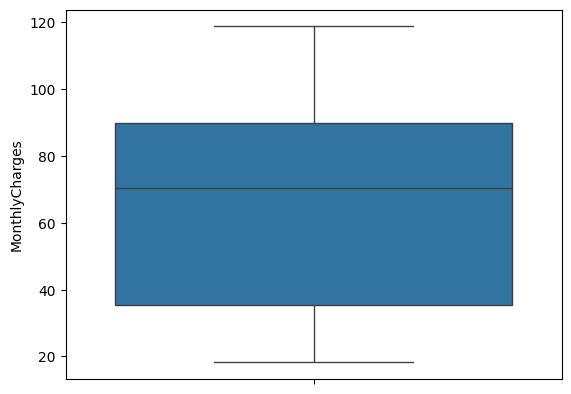

In [12]:
sns.boxplot(cchurn['MonthlyCharges'])

<Axes: ylabel='SeniorCitizen'>

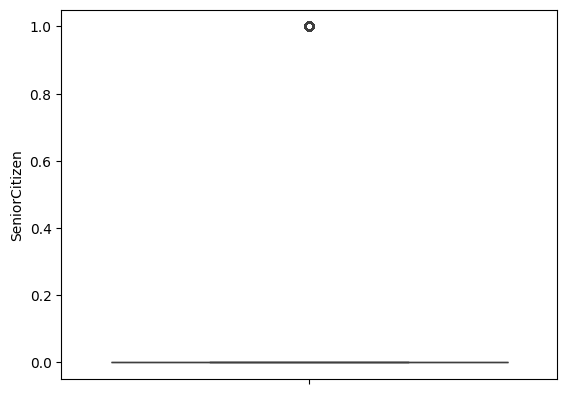

In [13]:
sns.boxplot(cchurn['SeniorCitizen'])

In [14]:
cchurn.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

#3. Feature Selection
Choosing the most relevant features that contribute to our target variable - Churn

<Axes: xlabel='PhoneService', ylabel='count'>

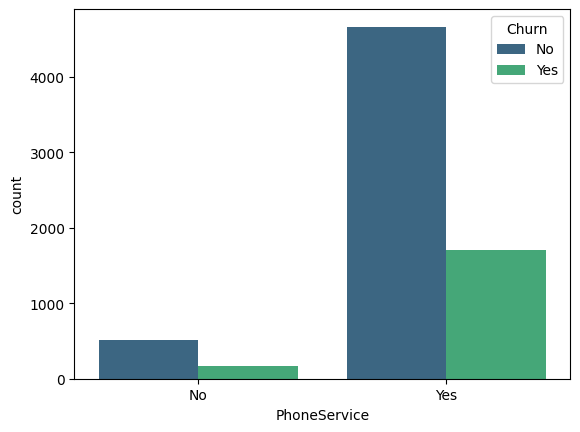

In [15]:
sns.countplot(data=cchurn, x='PhoneService', hue='Churn', palette='viridis')

<Axes: xlabel='MultipleLines', ylabel='count'>

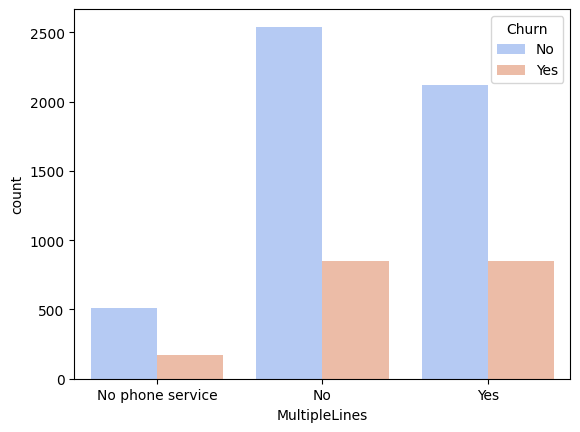

In [16]:
sns.countplot(x='MultipleLines', hue='Churn', data=cchurn, palette='coolwarm')

<Axes: xlabel='InternetService', ylabel='count'>

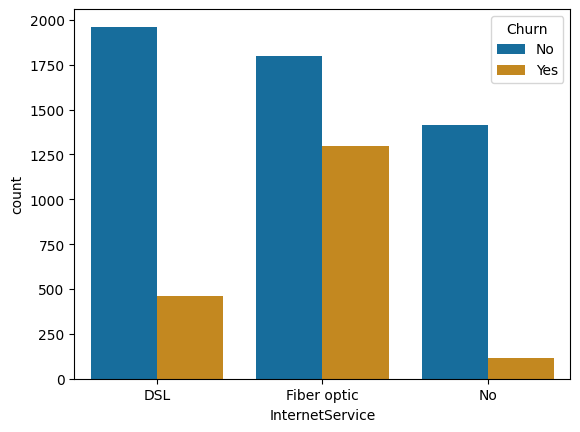

In [17]:
sns.countplot(data=cchurn, x='InternetService', hue='Churn', palette='colorblind')

<Axes: xlabel='StreamingTV', ylabel='count'>

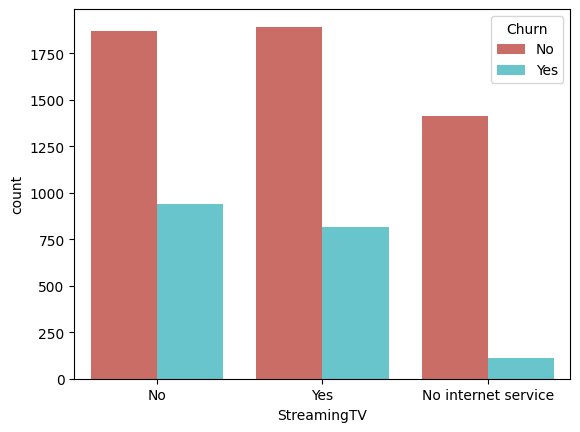

In [18]:
sns.countplot(data=cchurn, x='StreamingTV', hue='Churn', palette='hls')

<Axes: xlabel='gender', ylabel='count'>

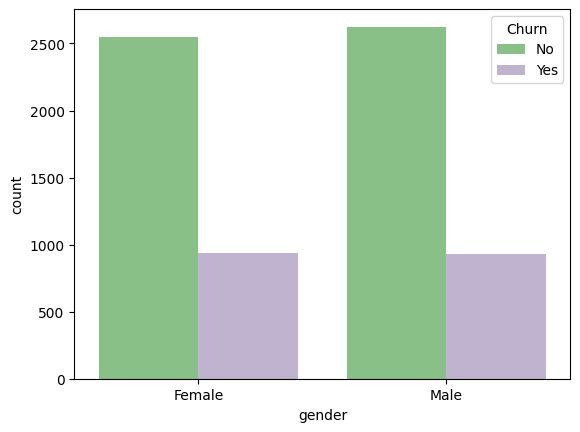

In [19]:
sns.countplot(data=cchurn, x='gender', hue='Churn', palette='Accent')

<Axes: xlabel='Dependents', ylabel='count'>

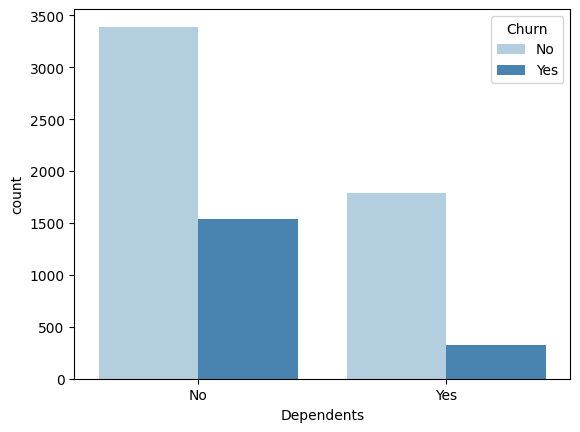

In [20]:
sns.countplot(data=cchurn, x='Dependents', hue='Churn', palette='Blues')

#4. Data Preprocessing

cchurn['TotalCharges'] contained null values and contained no outliers, therefore MEAN is the best statistical method to impute with.

In [21]:
#Impute null values with mean
cchurn['TotalCharges']
totalcharges_impu= cchurn['TotalCharges'].mean()
cchurn['TotalCharges'].fillna(totalcharges_impu, inplace=True)
cchurn['TotalCharges'].isnull().sum()
cchurn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#Dropping columns not needed
cchurn= cchurn.drop(columns=['customerID'])
cchurn.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [23]:
cchurn.shape

(7043, 20)

Encoding Categorical Variables

In [24]:
#Creating LabelEncoder object
label=LabelEncoder()
print(label)

LabelEncoder()


In [25]:
#Encoding all Categorical columns
columns_to_encode=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for column in columns_to_encode:
  cchurn[column]= label.fit_transform(cchurn[column])

#5. Train The Model

We split the dataset into two parts: independent variables (features) x and dependent variable (target) (churn) for y.

x contains the independent variables, which are the columns (gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity etc).

y contains the dependent variable, which is the column 'Churn' (is a measurement of the percentage of accounts that cancel or choose not to renew their subscriptions).

In [26]:
#Split data into features x and y
x=cchurn.drop('Churn', axis=1)
y=cchurn['Churn']

In [27]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [28]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

Train my LogisticRegression Model

In [29]:
logregress= LogisticRegression(max_iter=1000)
logregress.fit(x, y)

LogisticRegression(max_iter=1000)

In [30]:
logregress.coef_

array([[-8.94173283e-02,  2.91882674e-01, -1.45639513e-02,
        -2.42199307e-01, -6.37313448e-02, -5.20676240e-01,
         9.01169652e-02,  7.00580221e-02, -2.73382662e-01,
        -1.34048474e-01, -8.36868391e-02, -2.73336349e-01,
         1.39288195e-02,  1.88938802e-02, -8.16992646e-01,
         3.91229994e-01,  5.59309154e-04,  1.57416013e-02,
         3.90580786e-04]])

In [31]:
logregress.intercept_

array([-0.27699444])

In [32]:
#Predicting Churn for original values initially assigned to y_pred
y_pred= logregress.predict(x)
y_pred[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [33]:
#Original values assigned to y_pred
y[:10]

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64

Visualise Regression line

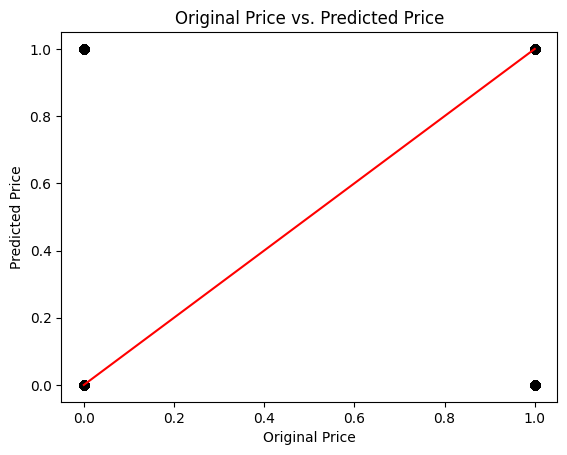

In [34]:
# Plot original data points
plt.scatter(y, y_pred, color='black')

# Plot the line of best fit
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-')
#(where y.min will return minimum value of y and y.max will return maximum value of y)

# Add labels and title
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs. Predicted Price')

# Show plot
plt.show()

#6. Model Evaluation

In [35]:
#Using accuracy score
accuracy=accuracy_score(y, y_pred)
print(accuracy)

0.8054806190543803


In [36]:
#Using Confusion Matrix
confu_matrix=confusion_matrix(y, y_pred)
print(confu_matrix)

[[4610  564]
 [ 806 1063]]


In [38]:
#Using Precision score
from sklearn.metrics import precision_score
pres_score=precision_score(y,y_pred)
print(pres_score)

0.6533497234173326


In [39]:
#Using F1
from sklearn.metrics import f1_score
f1_score=f1_score(y, y_pred)
print(f1_score)

0.6081235697940504


In [41]:
#Using Recall score
from sklearn.metrics import recall_score
recscore=recall_score(y, y_pred)
print(recscore)

0.5687533440342429


#MODEL PERFORMANCE METRICS

#Accuracy: 80.55%
The model correctly predicted around 80.55% of the instances.

#Precision: 65.33%
The model predicts a customer will churn, it is correct about 65.33% of the time.

#Recall: 56.89%
A recall score of 56.89% means that out of all the actual positive instances, 56.89% were correctly classified by the model as positive.

#F1 Score: 60.81%
Being that F1 score is balance btw precision and recall, An F1 score of 60.81% means that the model's performance is moderate and is correctly identifying positive cases 60.81% of the time when considering both precision and recall together. It's neither too biased towards precision nor recall.




#DOCUMENTATION

1. I imported necessary libraries to run this project.

2. Read my dataset into the dataframe

3. i explored my data checking the first rows, datatype of my columns, the dimensions of my dataset, the statistical data of the numeric columns using head(), info(), shape, describe() functions respectively.

4. I checked for null and duplicate values in my dataset. Null values were found but no duplicates.

5. i dropped the Customer ID column as it played no role in the dataset

6. Next, i checked for outliers in all numerical columns and found none.

7. Having found no outliers, i used the mean of the column where null values were found as a constant to impute for the null values.

8. I did visualization of some features such as PhoneService, InternetService, MultipleLines, StreamingTV, gender and Dependents.

9. I trained my model using the LogisticRegression from scikit learn and i evaluated my model and filed my model metrics.

#INSIGHTS

From my visulaization, i found that Customers with Phone service influence Churn more than Customers without Phone Service.

internet service influences Churn as well with Fibre optics customers influencing the rate of churn most.

churn is balanced in male and female.

Customers without dependents affect churn more than customers who have dependents.